In [112]:
# 导入pandas并且更名为pd

In [113]:
import pandas as pd

In [114]:
titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')

In [115]:
titanic.head()
# 分离数据特征和预测目标

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [116]:
y = titanic['survived']
X = titanic.drop(['row.names','name','survived'],axis=1)

In [117]:
# 对缺失数据进行补充

In [118]:
X['age'].fillna(X['age'].mean(),inplace = True)
X.head()

,pclass,age,embarked,home.dest,room,ticket,boat,sex
0,1st,29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,1st,2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,1st,30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,1st,25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,1st,0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [119]:
X.fillna("UNKNOWN",inplace=True)
X.head()

,pclass,age,embarked,home.dest,room,ticket,boat,sex
0,1st,29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,1st,2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,UNKNOWN,UNKNOWN,female
2,1st,30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,UNKNOWN,(135),male
3,1st,25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,UNKNOWN,UNKNOWN,female
4,1st,0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,UNKNOWN,11,male


In [120]:
# 分割数据，依然采用25%用于测试

In [121]:
from sklearn.cross_validation import  train_test_split

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 33)

In [123]:
# 类别型特征向量化

In [124]:
from sklearn.feature_extraction import DictVectorizer

In [125]:
vec = DictVectorizer()

In [126]:
X_train = vec.fit_transform(X_train.to_dict(orient = 'record'))

In [127]:
X_test = vec.transform(X_test.to_dict(orient='record'))

In [128]:
print len(vec.feature_names_)

474


In [129]:
print X_train.toarray()

[[ 31.19418104   0.           0.         ...,   0.           0.           1.        ]
 [ 31.19418104   0.           0.         ...,   0.           0.           0.        ]
 [ 31.19418104   0.           0.         ...,   0.           0.           1.        ]
 ..., 
 [ 12.           0.           0.         ...,   0.           0.           1.        ]
 [ 18.           0.           0.         ...,   0.           0.           1.        ]
 [ 31.19418104   0.           0.         ...,   0.           0.           1.        ]]


In [130]:
print vec.get_feature_names()

['age', 'boat=(103)', 'boat=(108)', 'boat=(109)', 'boat=(110)', 'boat=(122)', 'boat=(124)', 'boat=(126)', 'boat=(135)', 'boat=(140)', 'boat=(142)', 'boat=(148)', 'boat=(149)', 'boat=(15)', 'boat=(165)', 'boat=(171)', 'boat=(172)', 'boat=(174)', 'boat=(18)', 'boat=(189)', 'boat=(19)', 'boat=(190)', 'boat=(209)', 'boat=(22)', 'boat=(230)', 'boat=(232)', 'boat=(234)', 'boat=(236)', 'boat=(241)', 'boat=(245)', 'boat=(249)', 'boat=(258)', 'boat=(259)', 'boat=(263)', 'boat=(269)', 'boat=(275)', 'boat=(283)', 'boat=(286)', 'boat=(287)', 'boat=(292)', 'boat=(293)', 'boat=(307)', 'boat=(322)', 'boat=(38)', 'boat=(45)', 'boat=(46)', 'boat=(52)', 'boat=(62)', 'boat=(72)', 'boat=(75)', 'boat=(79)', 'boat=(80)', 'boat=(81)', 'boat=(89)', 'boat=(96)', 'boat=1', 'boat=10', 'boat=11', 'boat=12', 'boat=13', 'boat=14', 'boat=14/12', 'boat=14/D', 'boat=15', 'boat=16', 'boat=2', 'boat=3', 'boat=4', 'boat=5', 'boat=5/7', 'boat=6', 'boat=7', 'boat=8', 'boat=9', 'boat=A', 'boat=B', 'boat=C', 'boat=D', 'boat=

In [131]:
# 使用决策树模型依靠所有的特征进行预测，并作性能预测

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
dt = DecisionTreeClassifier(criterion = 'entropy')

In [134]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [135]:
dt.score(X_test,y_test)

0.82370820668693012

In [136]:
# 从sklearn中导入特征筛选器

In [137]:
from sklearn import  feature_selection

In [138]:
# 筛选前20%的特征，使用相同配置的决策树进行预测，并且进行性能评估

In [139]:
fs = feature_selection.SelectPercentile(feature_selection.chi2,percentile=20)

In [140]:
X_train_fs = fs.fit_transform(X_train,y_train)

In [141]:
X_test_fs = fs.transform(X_test)

In [142]:
dt.fit(X_train_fs,y_train)
dt.score(X_test_fs,y_test)

0.81458966565349544

In [143]:
# 从sklearn中导入特征筛选器

In [144]:
from sklearn.cross_validation import cross_val_score

In [145]:
import numpy as np

In [146]:
percentiles = range(1,100,2)

In [147]:
results = []

In [148]:
for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.chi2,percentile=i)
    X_train_fs = fs.fit_transform(X_train,y_train)
    scores = cross_val_score(dt,X_train_fs,y_train,cv = 5)
    results = np.append(results,scores.mean())
print results

[ 0.85063904  0.85673057  0.87501546  0.88622964  0.86793445  0.86998557
  0.86897547  0.87099567  0.87097506  0.86793445  0.86794475  0.86694496
  0.86693465  0.86387343  0.86285302  0.86384251  0.86284271  0.86590394
  0.86485261  0.86485261  0.8608122   0.86384251  0.87200577  0.86895485
  0.86488353  0.86896516  0.86896516  0.87301587  0.87199546  0.87301587
  0.86487322  0.86284271  0.86688312  0.86997526  0.86793445  0.86281179
  0.87402597  0.86893424  0.87098536  0.86997526  0.86894455  0.86789322
  0.86792414  0.86795506  0.86588332  0.86286333  0.85982272  0.85878169
  0.86284271  0.85880231]


In [149]:
# 找到最佳性能的特征筛选百分比

In [150]:
opt = np.where(results == results.max())[0]

In [152]:
print 'Optimal number of features %d'%percentiles[opt]

TypeError: only integer scalar arrays can be converted to a scalar index

In [153]:
import pylab as pl

In [154]:
pl.plot(percentiles,results)

In [155]:
pl.xlabel("percentiles of features")

In [156]:
pl.ylabel("accuracy")

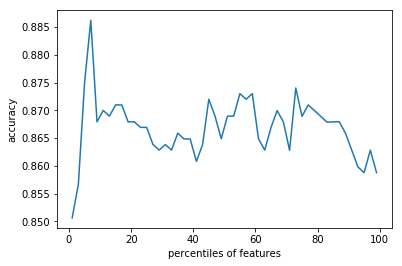

In [157]:
pl.show()